In [ ]:
# Computerübung C04
"Brueggemann, Rene-David, 10040204"
"Muslu, Batuhan, 10040332"

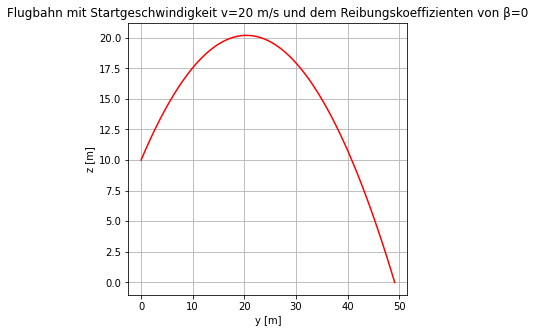

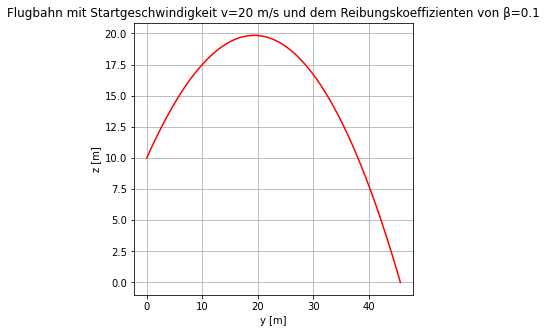

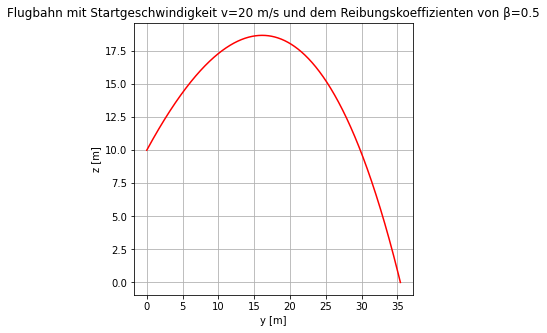

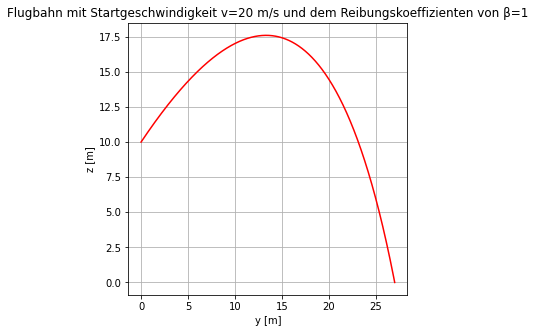

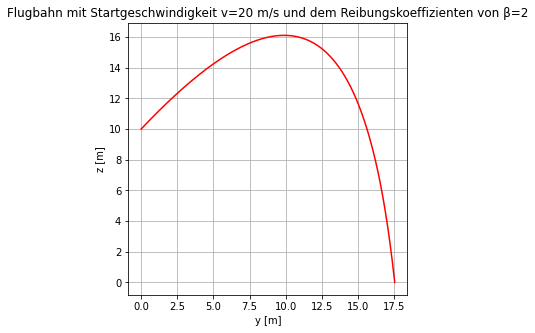

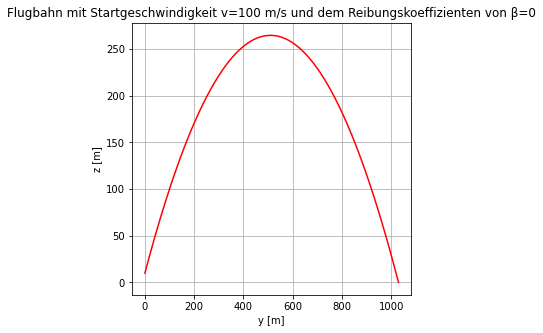

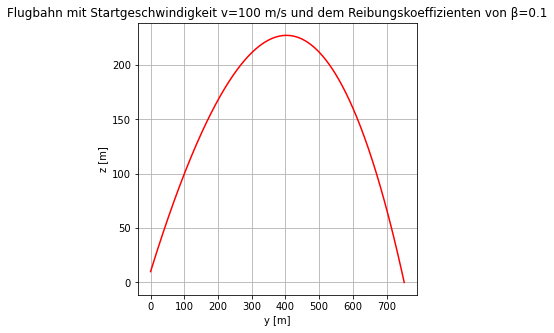

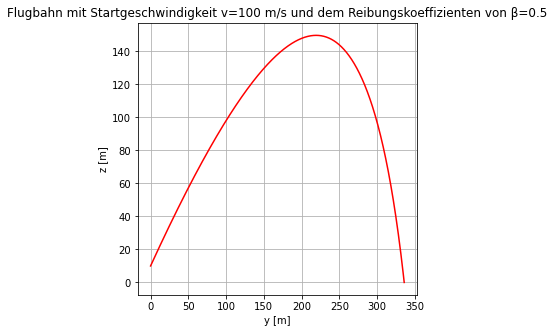

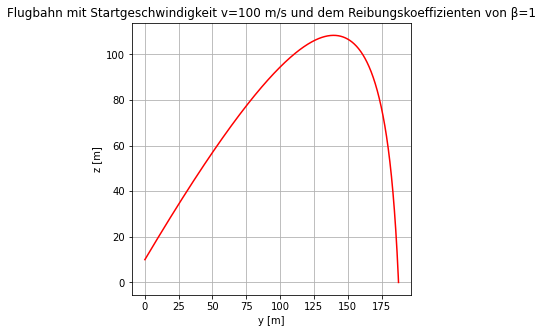

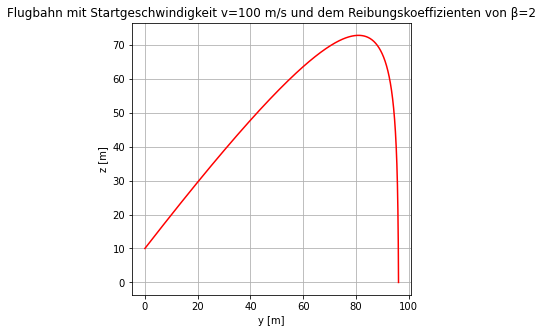

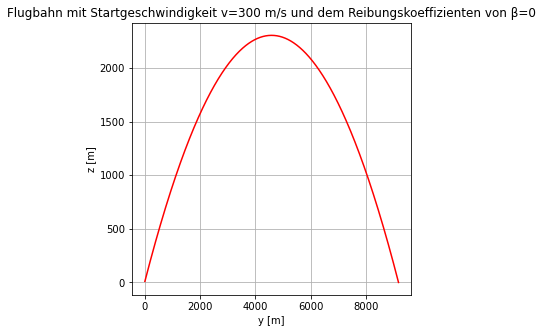

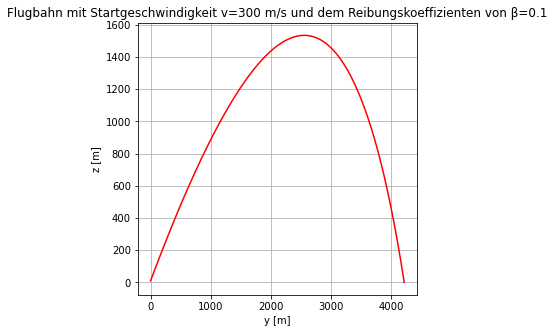

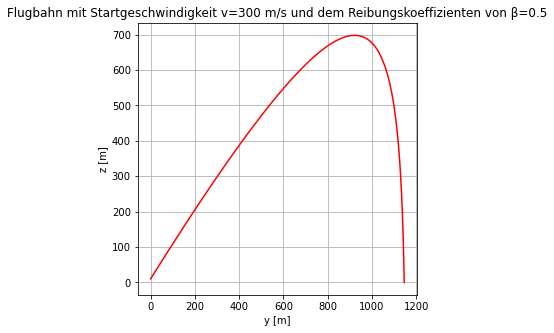

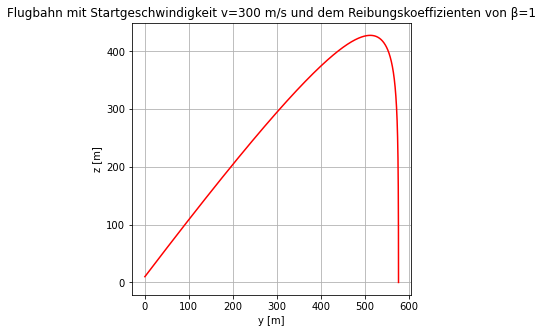

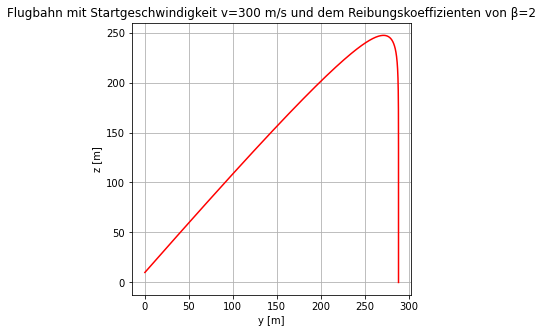

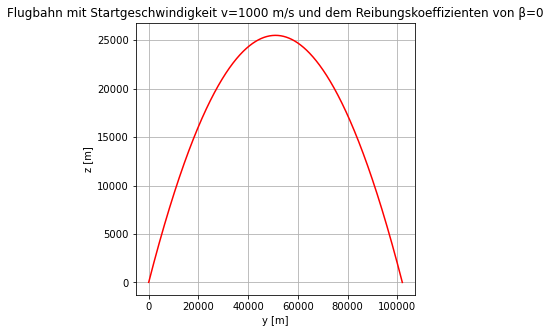

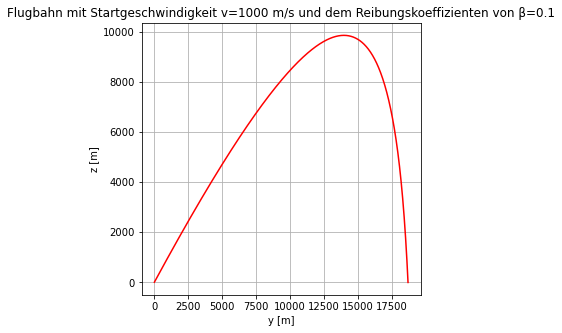

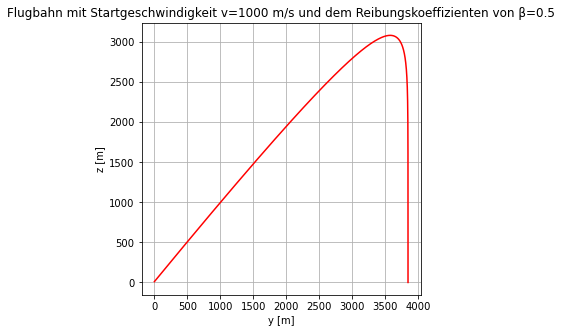

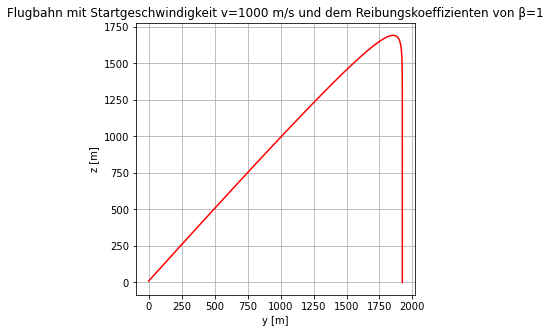

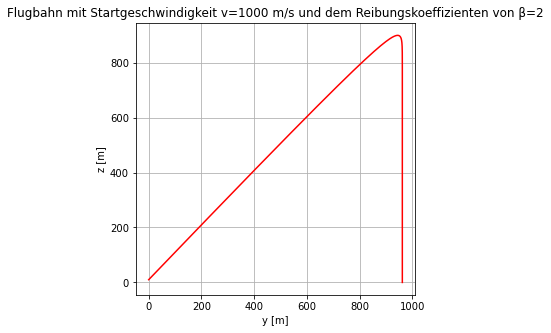

In [34]:
Aufgabe a
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy.integrate

# Skalierungsfaktoren
scal_v = 0.1
scal_a = 0.1

# Masse des Körpers [kg].
m = 2.72


# Anfangsort [m]
r0 = np.array([0, 10])

# Abwurfwinkel [rad].
alpha = math.radians(45.0)

# Betrag der Abwurfgeschwindigkeit [m/s].
va = 20, 100, 300, 1000

for ve in va:

    # Erdbeschleunigung [m/s²].
    g = 9.81

    B = 0, 0.1, 0.5, 1

    # Berechne den Vektor der Anfangsgeschwindigkeit [m/s].
    v0 = np.array([ve * math.cos(alpha), ve * math.sin(alpha)])

    for beta in B:
    
        def F(r, v):
            Fs = -1 * beta * v
            Fg = m * g * np.array([0, -1])
            return Fg + Fs
    
         
    
        def dgl(t, u):
            r, v = np.split(u, 2)
            return np.concatenate([v, F(r, v) / m])
    
    
        def aufprall(t, u):
            r, v = np.split(u, 2)
            return r[1]
    
    
        # Beende die Simulation beim Auftreten des Ereignisses.
        aufprall.terminal = True
    
        # Lege den Zustandsvektor zum Zeitpunkt t=0 fest.
        u0 = np.concatenate((r0, v0))
    
        # Löse die Bewegungsgleichung bis zum Auftreffen auf der Erde.
        result = scipy.integrate.solve_ivp(dgl, [0, 120000], u0,
                                           events=aufprall,
                                           dense_output=True)
        ts = result.t
        rs, vs = np.split(result.y, 2)
    
        # Berechne die Interpolation auf einem feinen Raster.
        t = np.linspace(0, np.max(ts), 1000)
        r, v = np.split(result.sol(t), 2)

        # Erzeuge eine Figure.
        fig = plt.figure(figsize=(5, 5))
    
        plt.xlabel('y [m]')
        plt.ylabel('z [m]')
        plt.grid()
        plt.title("Flugbahn mit Startgeschwindigkeit v=" +str(ve) +" m/s" + " und dem Reibungskoeffizienten von β=" +str(beta))
        plt.plot(r[0], r[1])
    
    
        plt.show()
    

Aufgabe b
An mittelalterlichen Flugbahnen von Kanonenkugeln ist im Vergleich zu unseren Resultaten zu erkennnen, dass sie nicht allzu unterschiedlich sind. Die mittelalterlichen Bahnen scheinen Konzepte wie Trägheit noch nicht anschaulich korrekt und präzise darzustellen. Das ist zum Beispiel an zu geradlinig verlaufenden Bahnen zu erkennen. Die resultierenden Schussweiten waren mit den unterschiedlichen Werten für die Geschwindigkeit nicht unerwartet, auch wenn es extreme Resultate gab. Die 100 m/s scheinen am vernünftigsten zu sein.

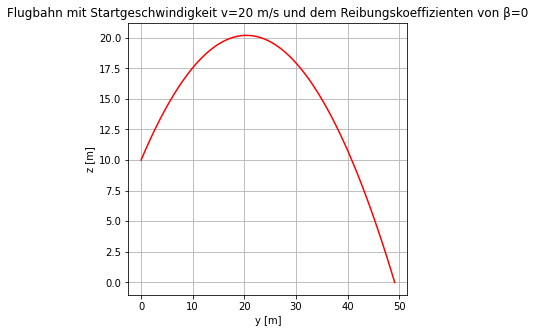

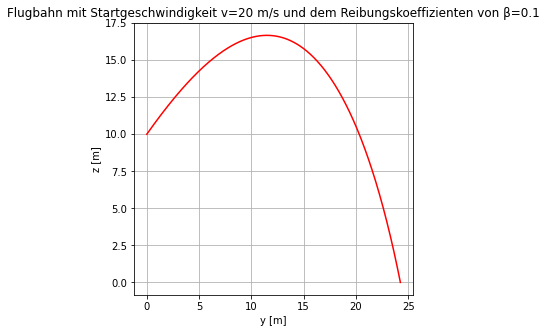

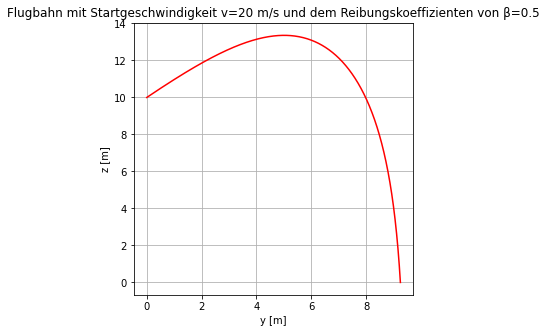

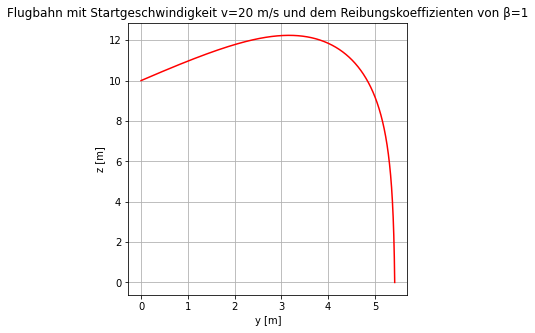

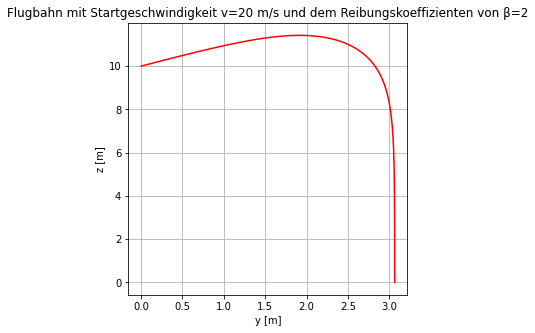

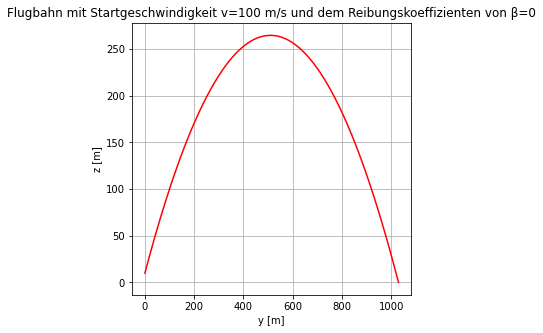

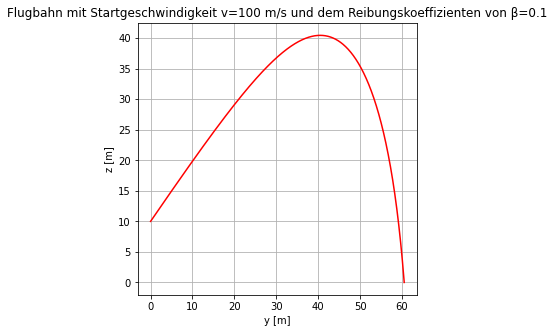

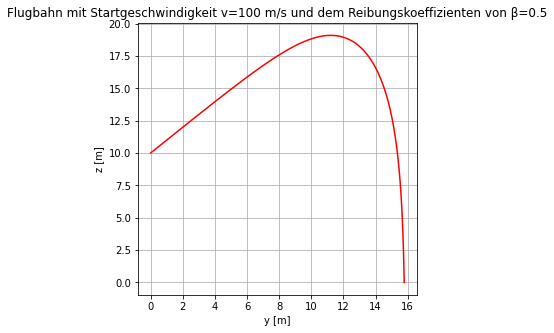

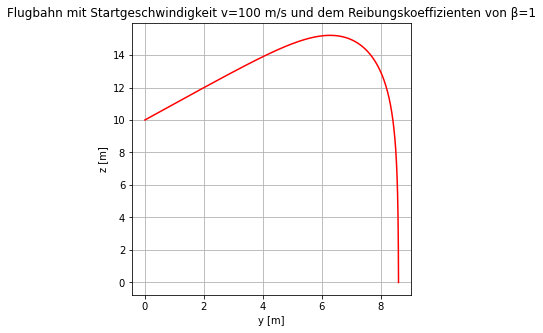

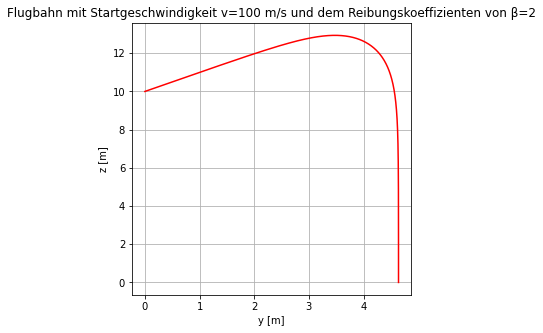

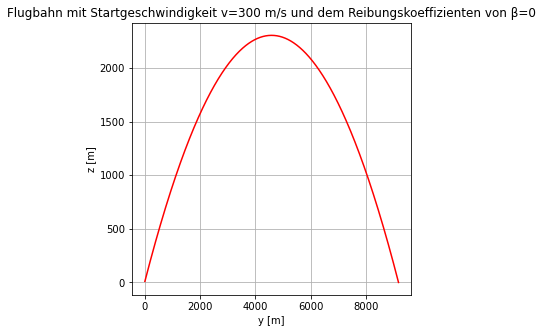

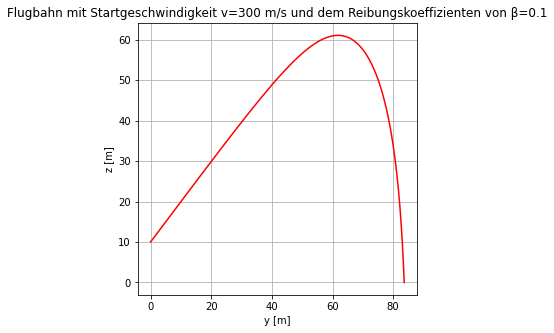

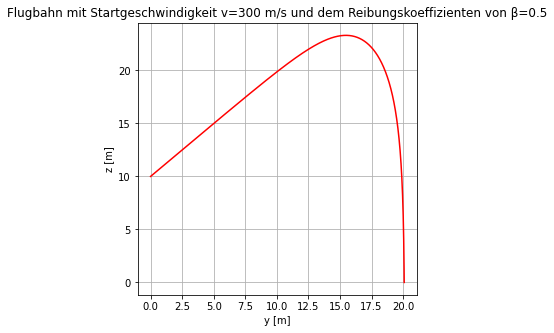

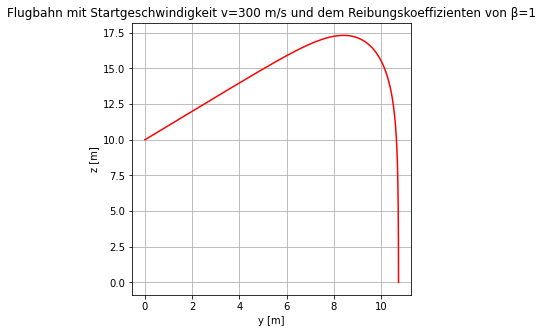

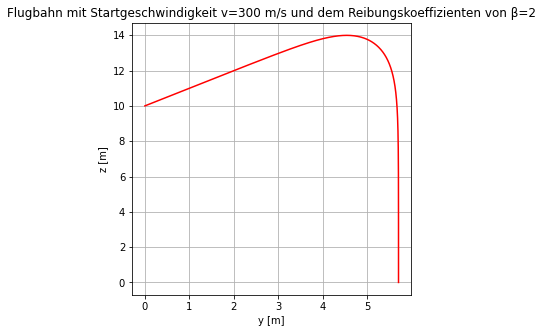

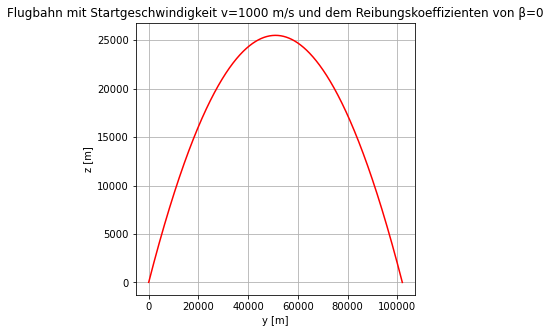

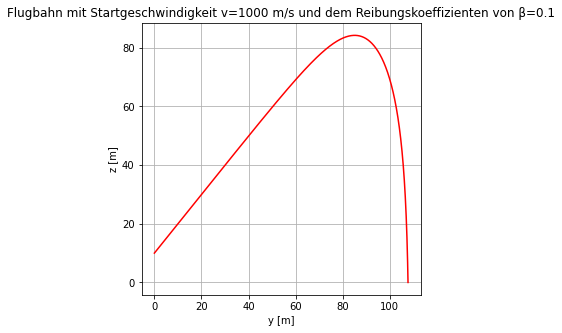

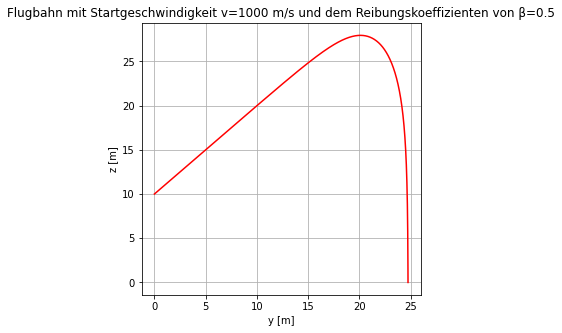

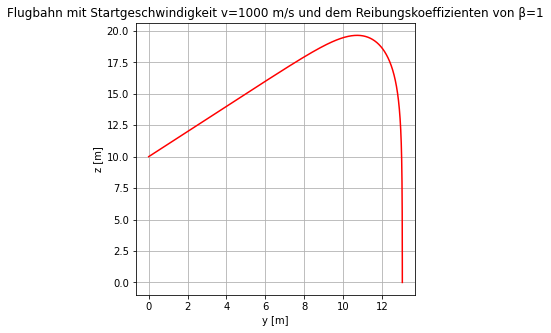

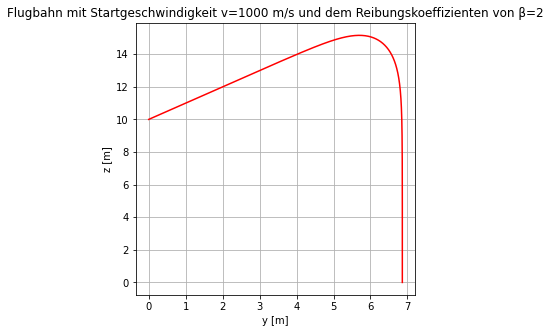

In [36]:
Aufgabe c
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy.integrate

# Skalierungsfaktoren
scal_v = 0.1
scal_a = 0.1

# Masse des Körpers [kg].
m = 2.72


# Anfangsort [m]
r0 = np.array([0, 10])

# Abwurfwinkel [rad].
alpha = math.radians(45.0)

# Betrag der Abwurfgeschwindigkeit [m/s].
va = 20, 100, 300, 1000

for ve in va:

    # Erdbeschleunigung [m/s²].
    g = 9.81

    B = 0, 0.1, 0.5, 1

    # Berechne den Vektor der Anfangsgeschwindigkeit [m/s].
    v0 = np.array([ve * math.cos(alpha), ve * math.sin(alpha)])

    for beta in B:
    
        def F(r, v):
            Fn = -1 * beta * v * math.sqrt(sum(i*i for i in v))
            Fg = m * g * np.array([0, -1])
            return Fg + Fn
    
         
    
        def dgl(t, u):
            r, v = np.split(u, 2)
            return np.concatenate([v, F(r, v) / m])
    
    
        def aufprall(t, u):
            r, v = np.split(u, 2)
            return r[1]
    
    
        # Beende die Simulation beim Auftreten des Ereignisses.
        aufprall.terminal = True
    
        # Lege den Zustandsvektor zum Zeitpunkt t=0 fest.
        u0 = np.concatenate((r0, v0))
    
        # Löse die Bewegungsgleichung bis zum Auftreffen auf der Erde.
        result = scipy.integrate.solve_ivp(dgl, [0, 120000], u0,
                                           events=aufprall,
                                           dense_output=True)
        ts = result.t
        rs, vs = np.split(result.y, 2)
    
        # Berechne die Interpolation auf einem feinen Raster.
        t = np.linspace(0, np.max(ts), 1000)
        r, v = np.split(result.sol(t), 2)

        # Erzeuge eine Figure.
        fig = plt.figure(figsize=(5, 5))
    
        plt.xlabel('y [m]')
        plt.ylabel('z [m]')
        plt.grid()
        plt.title("Flugbahn mit Startgeschwindigkeit v=" +str(ve) +" m/s" + " und dem Reibungskoeffizienten von β=" +str(beta))
        plt.plot(r[0], r[1])
    
    
        plt.show()

Aufgabe d
Die Ergebnisse der Newtonschen Reibung scheinen uns ähnlicher mit den mittelalterlichen Bahnen zu sein, jedoch auch diese auszubessern. Wir vermuten, dass diese gegenüber der Stokesschen Reibung ein realistischeres Modell ist. Die Werte für beta befinden sich realistisch gesehen zwischen 0 und 1.